In [1]:
from src import *
import dill
import os

In [2]:
settings = Settings()

In [3]:
dump_dict = None
with open(settings.paths.ws_dataset_dump_file, 'rb') as file:
    dump_dict = dill.load(file)

metrics_analysis_results = dump_dict['metrics_analysis_results']
feature_extractor = dump_dict['feature_extractor']

### XGBoost

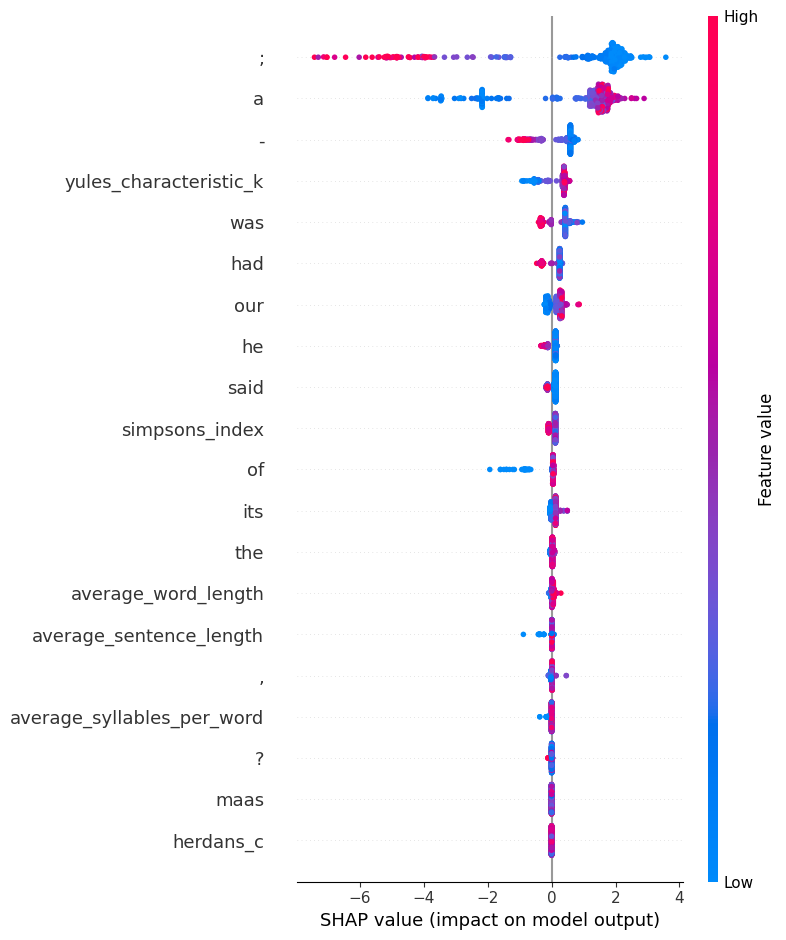

In [4]:
xgboost_results = WritingStyleAllFeaturesXGBoostClassification(
    settings=settings, 
    feature_extractor=feature_extractor
).fit_and_predict(metrics_analysis_results)

In [5]:
print(f"Accuracy of XGBoost model: {xgboost_results.all_chunks_binary_classification.accuracy}")

Accuracy of XGBoost model: 0.9979166666666667


In [6]:
if os.path.exists(settings.paths.ws_all_features_classification_dump_file):
    os.remove(settings.paths.ws_all_features_classification_dump_file)
with open(settings.paths.ws_all_features_classification_dump_file, 'wb') as file:
    dill.dump(
        obj={
            "xgboost_results": xgboost_results
        },  
        file=file
    )